# DoE | Análise de Resultados de Experimentos Fatoriais com Python

Nesta atividade, vamos analisar resultados de experimentos fatoriais. Iniciaremos por uma análise mais simples e manuale e avançaremos com o uso da ANOVA.

Vamos utilizar o dataset adaptado CAKE [cake.csv](https://drive.google.com/file/d/1rKsiVTj82Mtr_Mi_SPXwXFr71d32C3HV/view?usp=drive_link).

In [1]:
# importando bibliotecas
import pandas as pd
from google.colab import drive
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import t

# Atividade 0 - Baixe e Importe o Dataset
Importe o arquivo como dataframe do Pandas

In [2]:
pd.set_option('display.max_columns', None)
# importando o conjunto de dados

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ArquivosColab/cake.csv')
df

Mounted at /content/drive


,FLOUR,EGGS,TASTE
0,-1,-1,3.625
1,-1,-1,2.600
2,-1,1,5.250
3,-1,1,4.700
4,1,-1,3.775
5,1,-1,3.475
6,1,1,5.650
7,1,1,4.950


# Atividade 1 (Opcional) - Plote os experimentos presentes na Tabela
Sugestão: utilize a ferramenta `PairGrid` do Seaborn

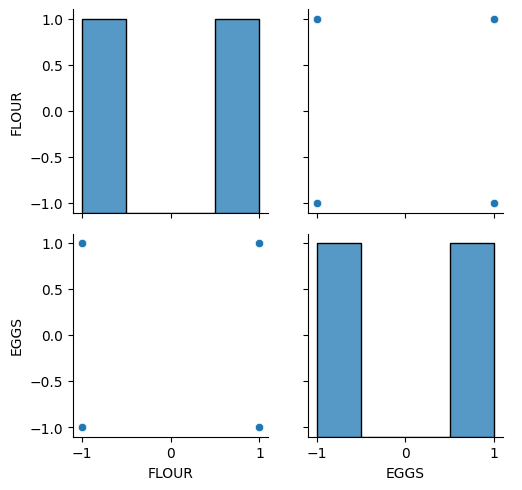

In [3]:
# PairGrid
g = sns.PairGrid( df[df.columns[:-1]] )

g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

g.add_legend()

# Atividade 2 - Divida o dataframe e calcule os efeitos do primeiro fator

In [5]:
# FLOUR 1 / A

df_flour_a = df[df['FLOUR']==1]
flour_a = df_flour_a['TASTE'].mean()

print(flour_a)
df_flour_a

4.4625


,FLOUR,EGGS,TASTE
4,1,-1,3.775
5,1,-1,3.475
6,1,1,5.650
7,1,1,4.950


In [6]:
# FLOUR -1 / B

df_flour_b = df[df['FLOUR']==-1]
flour_b = df_flour_b['TASTE'].mean()

print(flour_b)
df_flour_b

4.04375


,FLOUR,EGGS,TASTE
0,-1,-1,3.625
1,-1,-1,2.600
2,-1,1,5.250
3,-1,1,4.700


In [7]:
efeito_flour = abs(flour_a - flour_b)
efeito_flour

0.4187500000000002

* **Comentário:** O efeito de Flour é de 0,42.

# Atividade 2 - Divida o dataframe e calcule os efeitos do segundo fator

In [8]:
# EGGS 1 / A

df_eggs_a = df[df['EGGS']==1]
eggs_a = df_eggs_a['TASTE'].mean()

print(eggs_a)
df_eggs_a

5.1375


,FLOUR,EGGS,TASTE
2,-1,1,5.25
3,-1,1,4.70
6,1,1,5.65
7,1,1,4.95


In [9]:
# EGGS -1 / B

df_eggs_b = df[df['EGGS']==-1]
eggs_b = df_eggs_b['TASTE'].mean()

print(eggs_b)
df_eggs_b

3.36875


,FLOUR,EGGS,TASTE
0,-1,-1,3.625
1,-1,-1,2.600
4,1,-1,3.775
5,1,-1,3.475


In [10]:
efeito_eggs = abs(eggs_a - eggs_b)
efeito_eggs

1.7687500000000003

* **Comentário:** O efeito de Egss é de 1,77.

# Atividade 3 - Calcule o Efeito combinado
Dica: Esse efeito é obtido a partir das Diagonais

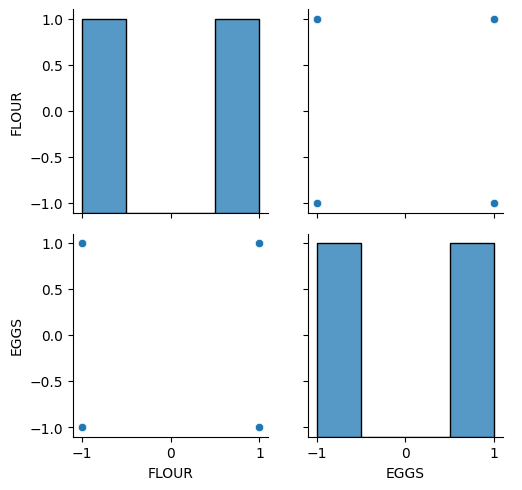

In [11]:
# PairGrid
g = sns.PairGrid( df[df.columns[:-1]] )

g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

g.add_legend()

In [12]:
# efeito da diagonal ascendente

#[1,1]
d_aa = df[(df['FLOUR']==1) & (df['EGGS']==1)]
aa = d_aa['TASTE'].mean()
aa

#[1,1]
d_bb = df[(df['FLOUR']==-1) & (df['EGGS']==-1)]
bb = d_bb['TASTE'].mean()
bb

# combinar os resultar
interacao_aabb = (aa + bb) / 2
interacao_aabb

4.206250000000001

* **Comentário:** O efeito combinado ascendente é de 4,21.

In [13]:
# efeito da diagonal descendente

#[1,-1]
d_ab = df[(df['FLOUR']==1) & (df['EGGS']==-1)]
ab = d_ab['TASTE'].mean()
ab

#[-1,1]
d_ba = df[(df['FLOUR']==-1) & (df['EGGS']==1)]
ba = d_ba['TASTE'].mean()
ba

# combinar os resultar
interacao_abba = (ab + ba) / 2
interacao_abba

4.3

* **Comentário:** O efeito combinado descendente é de 4,3.

In [14]:
# efeito combinado

efeito_interacao = abs(interacao_aabb - interacao_abba)
efeito_interacao

0.09374999999999911

In [15]:
print(efeito_flour)
print(efeito_eggs)
print(efeito_interacao)

0.4187500000000002
1.7687500000000003
0.09374999999999911


* **Comentário:** A diferença entre os efeitos é de 0,94.

In [16]:
df

,FLOUR,EGGS,TASTE
0,-1,-1,3.625
1,-1,-1,2.600
2,-1,1,5.250
3,-1,1,4.700
4,1,-1,3.775
5,1,-1,3.475
6,1,1,5.650
7,1,1,4.950


# Atividade 4 - Crie um Modelo de Efeitos Fixos e faça a Análise Estatística

**Análise Estatística do Modelo de Efeitos Fixos (Fixed Effects Model)**

O modelo de efeitos fixos assume que os níveis de cada fator são fixos e pré-determinados. Isso significa que o objetivo do experimento é avaliar o efeito dos diferentes níveis dos fatores, em vez de fazer inferências sobre uma população mais ampla.

A análise estatística do modelo de efeitos fixos envolve a construção de um modelo matemático que relaciona os níveis dos fatores com as variáveis de resposta. Normalmente, utiliza-se a regressão linear para estabelecer essa relação.

Atividade 4.1: Crie o Modelo
Sugestão: utilize o OLS (Ordinary Least Squares / Mínimos Quadrados Ordinários)

In [17]:
funcao = 'TASTE ~ FLOUR + EGGS + FLOUR*EGGS'
modelo = ols(funcao,df).fit()

In [18]:
modelo.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TASTE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     9.139
Date:                Fri, 06 Oct 2023   Prob (F-statistic):             0.0291
Time:                        21:31:08   Log-Likelihood:                -2.8977
No. Observations:                   8   AIC:                             13.80
Df Residuals:                       4   BIC:                             14.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2531      0.174     24.472      0.000       3.771       4.736
FLOUR          0.2094      0.174      1.205      0.295      -0.273       0.692
EGGS           0.8844      0.174      5.089      0.007       0.402       1.367
FLOUR:EGGS    -0.0469      0.174     -0.270      0.801      -0.529       0.436
==============================================================================
Omnibus:                        1.701   Durbin-Watson:                   3.087
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                0.706
Skew:                           0.000   Prob(JB):                        0.703
Kurtosis:                       1.545   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Atividade 4.2 - Faça a Análise Estatística do Modelo Utilizando ANOVA

In [19]:
anova = sm.stats.anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
FLOUR,1.0,0.350703,0.350703,1.451342,0.294716
EGGS,1.0,6.256953,6.256953,25.893631,0.007038
FLOUR:EGGS,1.0,0.017578,0.017578,0.072745,0.800724
Residual,4.0,0.966562,0.241641,NaN,NaN


* **Comentário:** O Residual é de 4,0.

Atividade 4.3 - Faça o Teste T de Student e verifique quais Fatores tiveram efeitos estatisticamente relevantes

Instrução: considere um nível de confiança esperado como 95%


Sugestão: utilize a função `ppf` do `scipy`.

A função `ppf` calcula a **função de distribuição cumulativa inversa** e leva no mínimo 2 argumentos: ppf(q,df).
> Obs: Os outros argumentos são: loc (média) e escala (desvio padrão) - ambos opcionais (quando não declarados, o padrão é 0 e 1, respectivamente).

Por definição, um resultado de x para um determinado valor q e df significa P{T <= x} = q, ou seja, há probabilidade q de obter resultados menores ou iguais a x de uma distribuição T com o local e a escala fornecidos.


Considerando um nível de confiança de 95%, você deseja que 5% da probabilidade esteja nas extremidades da distribuição. Isso geralmente é feito simetricamente para que 2,5% esteja em cada cauda, portanto, você usaria valores q de 0,025 e 0,975 para os pontos de corte inferior e superior, respectivamente.

In [20]:
tst = t.ppf(0.975,4)
tst

2.7764451051977987

* **Comentário:** O resultado do Test T foi 2,78, indicando que Eggs tem mais influência sobre o experimento.